# Introdução

O Método da Potência é um algoritmo iterativo utilizado para determinar o maior valor próprio (autovalor) em módulo de uma matriz quadrada e o correspondente vetor próprio (autovetor). Este método é especialmente útil em aplicações onde se necessita do autovalor dominante, como em análise de páginas da web (PageRank), processamento de imagens, e na resolução de sistemas de equações lineares.


# Objetivos

Nesse trabalho, queremos buscar:

*   Implementar o Método da Potência em Python.
*   Demonstrar a convergência do método através de exemplos práticos.
*   Analisar a complexidade computacional do algoritmo.
*   Visualizar graficamente a evolução das iterações.



# Relembrando (conceitos de álgebra linear, autovetores e autovalores)

<!-- Recomendações do jorge: analisar a complexidade do método (Ex: O(n³)), entender

melhorias que o pessoal faz, em que casos ele é mais rápido ou menos, provar isso, mostrar com gráficos -->

# Pacotes python para a prática

Falar os pacotes aí

# Método das Potências (Power Method)

O *Método das Potências* é um algoritmo iterativo utilizado para determinar o maior valor próprio (em módulo) de uma matriz quadrada $A \in \mathbb{C}^{n \times n}$, assim como o respectivo vetor próprio associado. Este método é particularmente eficaz quando o maior valor próprio é simples e possui a maior magnitude em relação aos demais valores próprios.

### Iteração Básica

O processo iterativo do Método das Potências pode ser descrito pelas seguintes etapas:

1. Inicialização: Escolhe-se um vetor inicial $q^{(0)} \in \mathbb{C}^n$ que tenha componentes não nulas na direção do vetor próprio dominante.

2. Multiplicação pela Matriz: Calcula-se o produto $z^{(k)} = A q^{(k-1)}$.

3. Normalização: Obtém-se o próximo vetor iterado $q^{(k)}$ normalizando $z^{(k)}$:
   $$
   q^{(k)} = \frac{z^{(k)}}{\|z^{(k)}\|_2}
   $$

4. Estimativa do Valor Próprio: Calcula-se uma estimativa do valor próprio dominante $\nu^{(k)}$ utilizando o quociente de Rayleigh:
   $$
   \nu^{(k)} = (q^{(k)})^H A q^{(k)}
   $$

Vejamos a seguir a aplicação dessa iteração:

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def power_method(A, num_iterations=1000, tolerance=1e-10):
    """
    Implementa o Método da Potência para encontrar o maior autovalor e o vetor próprio correspondente.

    Parâmetros:
    A (np.ndarray): Matriz quadrada.
    num_iterations (int): Número máximo de iterações.
    tolerance (float): Critério de convergência.

    Retorna:
    eigenvalue (float): Maior autovalor em módulo.
    eigenvector (np.ndarray): Vetor próprio correspondente.
    iterations (int): Número de iterações realizadas.
    eigenvalues_history (list): Histórico dos autovalores estimados em cada iteração.
    """
    n, m = A.shape
    assert n == m, "A matriz deve ser quadrada."

    # Inicialização: vetor inicial (pode ser aleatório)
    b_k = np.random.rand(n)
    b_k = b_k / np.linalg.norm(b_k)

    eigenvalues_history = []

    for iteration in range(1, num_iterations + 1):
        # Multiplicação da matriz pelo vetor
        b_k1 = np.dot(A, b_k)

        # Normalização do novo vetor
        b_k1_norm = np.linalg.norm(b_k1)
        b_k1 = b_k1 / b_k1_norm

        # Estimativa do autovalor usando a razão de Rayleigh
        eigenvalue = np.dot(b_k, np.dot(A, b_k))
        eigenvalues_history.append(eigenvalue)

        # Verificação da convergência
        if np.linalg.norm(b_k1 - b_k) < tolerance:
            break

        b_k = b_k1

    return eigenvalue, b_k, iteration, eigenvalues_history


# Explicação

# Visualizações Gráficas

Visualizar a convergência do Método da Potência ajuda a entender como os autovalores estimados se aproximam do valor verdadeiro ao longo das iterações.



In [9]:
# Definição da matriz A
A1 = np.array([
    [5, 0, 0],
    [0, 3, 0],
    [0, 0, 1]
])

# Aplicação do Método da Potência
eigenvalue1, eigenvector1, iterations1, history1 = power_method(A1)

print(f"Maior Autovalor: {eigenvalue1}")
print(f"Vetor Próprio Correspondente: {eigenvector1}")
print(f"Número de Iterações: {iterations1}")

Maior Autovalor: 5.0
Vetor Próprio Correspondente: [1.00000000e+00 1.77492468e-10 1.59846388e-32]
Número de Iterações: 46


In [ ]:
# Definição da matriz A
A2 = np.array([
    [4, 1, 1],
    [2, 3, 1],
    [1, 1, 2]
])

# Aplicação do Método da Potência
eigenvalue2, eigenvector2, iterations2, history2 = power_method(A2)

print(f"Maior Autovalor: {eigenvalue2}")
print(f"Vetor Próprio Correspondente: {eigenvector2}")
print(f"Número de Iterações: {iterations2}")

Maior Autovalor: 5.561552812708652
Vetor Próprio Correspondente: [0.6571923  0.6571923  0.36904818]
Número de Iterações: 22


# Convergência dos Autovalores
Vamos plotar o histórico dos autovalores estimados para os dois exemplos anteriores.

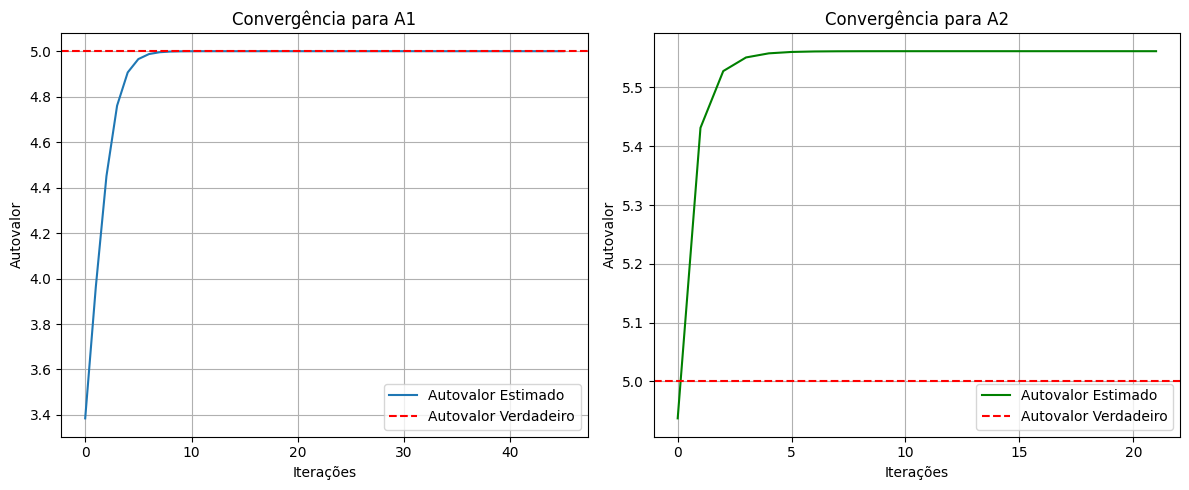

In [17]:
# Plot para a Matriz A1
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history1, label='Autovalor Estimado')
plt.axhline(y=5.0, color='r', linestyle='--', label='Autovalor Verdadeiro')
plt.xlabel('Iterações')
plt.ylabel('Autovalor')
plt.title('Convergência para A1')
plt.legend()
plt.grid(True)

# Plot para a Matriz A2
plt.subplot(1, 2, 2)
plt.plot(history2, label='Autovalor Estimado', color='g')
plt.axhline(y=5.0, color='r', linestyle='--', label='Autovalor Verdadeiro')
plt.xlabel('Iterações')
plt.ylabel('Autovalor')
plt.title('Convergência para A2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Evolução do Vetor Próprio
Podemos também visualizar como os componentes do vetor próprio convergem.

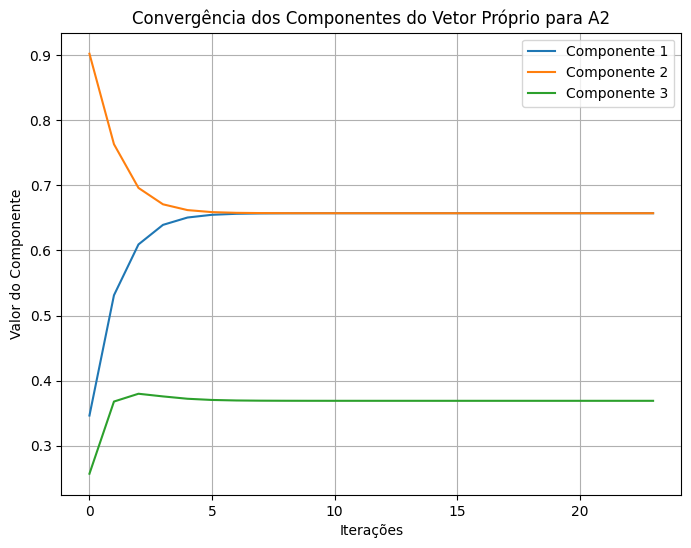

In [ ]:
# Função modificada para armazenar o histórico dos vetores
def power_method_with_history(A, num_iterations=1000, tolerance=1e-10):
    n, m = A.shape
    assert n == m, "A matriz deve ser quadrada."

    b_k = np.random.rand(n)
    b_k = b_k / np.linalg.norm(b_k)

    eigenvalues_history = []
    eigenvectors_history = [b_k.copy()]

    for iteration in range(1, num_iterations + 1):
        b_k1 = np.dot(A, b_k)
        b_k1_norm = np.linalg.norm(b_k1)
        b_k1 = b_k1 / b_k1_norm

        eigenvalue = np.dot(b_k, np.dot(A, b_k))
        eigenvalues_history.append(eigenvalue)

        eigenvectors_history.append(b_k1.copy())

        if np.linalg.norm(b_k1 - b_k) < tolerance:
            break

        b_k = b_k1

    return eigenvalue, b_k, iteration, eigenvalues_history, eigenvectors_history

# Aplicação com histórico de vetores
eigenvalue2, eigenvector2, iterations2, history2, vectors2 = power_method_with_history(A2)

# Convertendo o histórico de vetores para um array
vectors2 = np.array(vectors2)

# Plotando a convergência dos componentes
plt.figure(figsize=(8, 6))
for i in range(A2.shape[0]):
    plt.plot(vectors2[:, i], label=f'Componente {i+1}')
plt.xlabel('Iterações')
plt.ylabel('Valor do Componente')
plt.title('Convergência dos Componentes do Vetor Próprio para A2')
plt.legend()
plt.grid(True)
plt.show()


# Complexidade do Algoritmo

A análise da complexidade computacional do Método da Potência é crucial para entender sua eficiência, especialmente para matrizes de grande dimensão.




# Conclusão

O Método da Potência é uma ferramenta poderosa na análise de matrizes,permitindo a determinação eficiente do maior autovalor e seu vetor próprio correspondente. Sua simplicidade e eficácia o tornam amplamente aplicável em diversas áreas da ciência e engenharia. Contudo, sua dependência na razão entre autovalores e a complexidade computacional associada à multiplicação de matrizes exigem considerações cuidadosas ao aplicá-lo a problemas de grande escala.



# Referências

Frapetti, D. (n.d.). *Corso di algebra lineare, parte 2*. Université Côte d'Azur. Recuperado de [https://math.univ-cotedazur.fr/~frapetti/CorsoF/cours4part2.pdf](https://math.univ-cotedazur.fr/~frapetti/CorsoF/cours4part2.pdf)



# Método das Potências (Power Method)

O *Método das Potências* é um algoritmo iterativo utilizado para determinar o maior valor próprio (em módulo) de uma matriz quadrada $A \in \mathbb{C}^{n \times n}$, assim como o respectivo vetor próprio associado. Este método é particularmente eficaz quando o maior valor próprio é simples e possui a maior magnitude em relação aos demais valores próprios.

### Iteração Básica

O processo iterativo do Método das Potências pode ser descrito pelas seguintes etapas:

1. Inicialização: Escolhe-se um vetor inicial $q^{(0)} \in \mathbb{C}^n$ que tenha componentes não nulas na direção do vetor próprio dominante.

2. Multiplicação pela Matriz: Calcula-se o produto $z^{(k)} = A q^{(k-1)}$.

3. Normalização: Obtém-se o próximo vetor iterado $q^{(k)}$ normalizando $z^{(k)}$:
   $$
   q^{(k)} = \frac{z^{(k)}}{\|z^{(k)}\|_2}
   $$

4. Estimativa do Valor Próprio: Calcula-se uma estimativa do valor próprio dominante $\nu^{(k)}$ utilizando o quociente de Rayleigh:
   $$
   \nu^{(k)} = (q^{(k)})^H A q^{(k)}
   $$

### Convergência

Sob condições adequadas, o Método das Potências converge para o vetor próprio dominante $x_1$ e para o valor próprio $\lambda_1$. A convergência é assegurada quando o vetor inicial $q^{(0)}$ tem uma componente não nula na direção de $x_1$. A expressão iterativa para $q^{(k)}$ pode ser representada como:

$$
q^{(k)} = \frac{A^k q^{(0)}}{\|A^k q^{(0)}\|_2}, \quad q^{(0)} = \sum_{i=1}^n \alpha_i x_i
$$

Onde $x_i$ são os vetores próprios de $A$ e $\alpha_i$ são os coeficientes das componentes iniciais. Após expandir, temos:

$$
A^k q^{(0)} = \alpha_1 \lambda_1^k \left( x_1 + \sum_{i=2}^n \frac{\alpha_i}{\alpha_1} \left( \frac{\lambda_i}{\lambda_1} \right)^k x_i \right)
$$

À medida que $k$ aumenta, os termos $\left( \frac{\lambda_i}{\lambda_1} \right)^k$ tendem a zero se $|\lambda_i| < |\lambda_1|$, garantindo que $q^{(k)}$ se aproxime de $x_1$.

### Erro de Convergência

A taxa de convergência do Método das Potências é determinada pela razão das magnitudes dos dois maiores valores próprios, $\lambda_1$ e $\lambda_2$. O erro na aproximação do vetor próprio pode ser estimado por:

$$
\|q^{(k)} - x_1\|_2 \leq C \left| \frac{\lambda_2}{\lambda_1} \right|^k, \quad C = \sqrt{\sum_{i=2}^n \left(\frac{\alpha_i}{\alpha_1}\right)^2}
$$

Isso indica que o erro diminui exponencialmente com a iteração $k$, desde que $|\lambda_2 / \lambda_1| < 1$.

### Estimativa do Erro no Valor Próprio

Além da aproximação do vetor próprio, o Método das Potências também fornece uma estimativa para o valor próprio dominante. A precisão dessa estimativa pode ser avaliada utilizando o quociente de Rayleigh:

$$
| \lambda_1 - \nu^{(k)} | \leq \frac{\|r^{(k)}\|_2}{|\cos(\theta_\lambda)|}, \quad r^{(k)} = A q^{(k)} - \nu^{(k)} q^{(k)}
$$

Aqui, $r^{(k)}$ representa o resíduo da aproximação, e $\theta_\lambda$ é o ângulo entre o vetor próprio exato $x_1$ e a aproximação $q^{(k)}$. Esta desigualdade fornece uma forma prática de avaliar a precisão do valor próprio estimado em cada iteração.

### Conclusão

O Método das Potências é uma ferramenta fundamental na álgebra linear numérica para a determinação do maior valor próprio e seu vetor associado de uma matriz. Sua simplicidade e eficiência o tornam amplamente utilizado em aplicações que envolvem grandes matrizes esparsas, como em métodos de PageRank e em problemas de mecânica estrutural.